# <center>Mathematical Foundations of Analytics
## <center>CS660 – (CRN# 22921)
## <center>By: Prof. Thassos Sarbanes
## <center>Project #3
<center>Ran Roffe <br>Nipun Ranchhod Navadia

### Let’s review how the CART (Classification And Regression Tree) algorithms work in
### Python’s scikit-learn module.
### Namely, we should study the following Decision Tree libraries:
### 1_ DecisionTreeClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#### 2_ DecisionTreeRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
#### 3_ RandomForestClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#### 4_ RandomForestRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
You should perform both Classification and Regression modeling on the following
#### datasets:
##### A_ For classification use scikit-learn’s hand-written digits (each data point is an 8X8 image
of a single digit)
 https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits
##### B_ For regression use scikit-learn’s California-housing dataset
https://scikit-
learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_ho
using

# Classification
##### * Perform Exploratory Data Analysis (EDA) on both datasets.
##### * Perform classification task on the digit’s dataset, utilizing both DTClassifier and RandomForest with their default parameters. Which one performs better? Print out their respective Confusion Matrices.
##### * Perform same task as #1, but now tune the classifiers. Which one performs better? Print out their respective Confusion Matrices.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# loading the data
digits = load_digits()
X = digits.data
y = labels = digits.target
images = digits.images

## EDA

In [3]:
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features per sample: {X.shape[1]} (8x8 pixels)")
print(f"Unique labels: {np.unique(y)}")
print(f"Label distribution:\n{np.bincount(y)}")

Number of samples: 1797
Number of features per sample: 64 (8x8 pixels)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Label distribution:
[178 182 177 183 181 182 181 179 174 180]


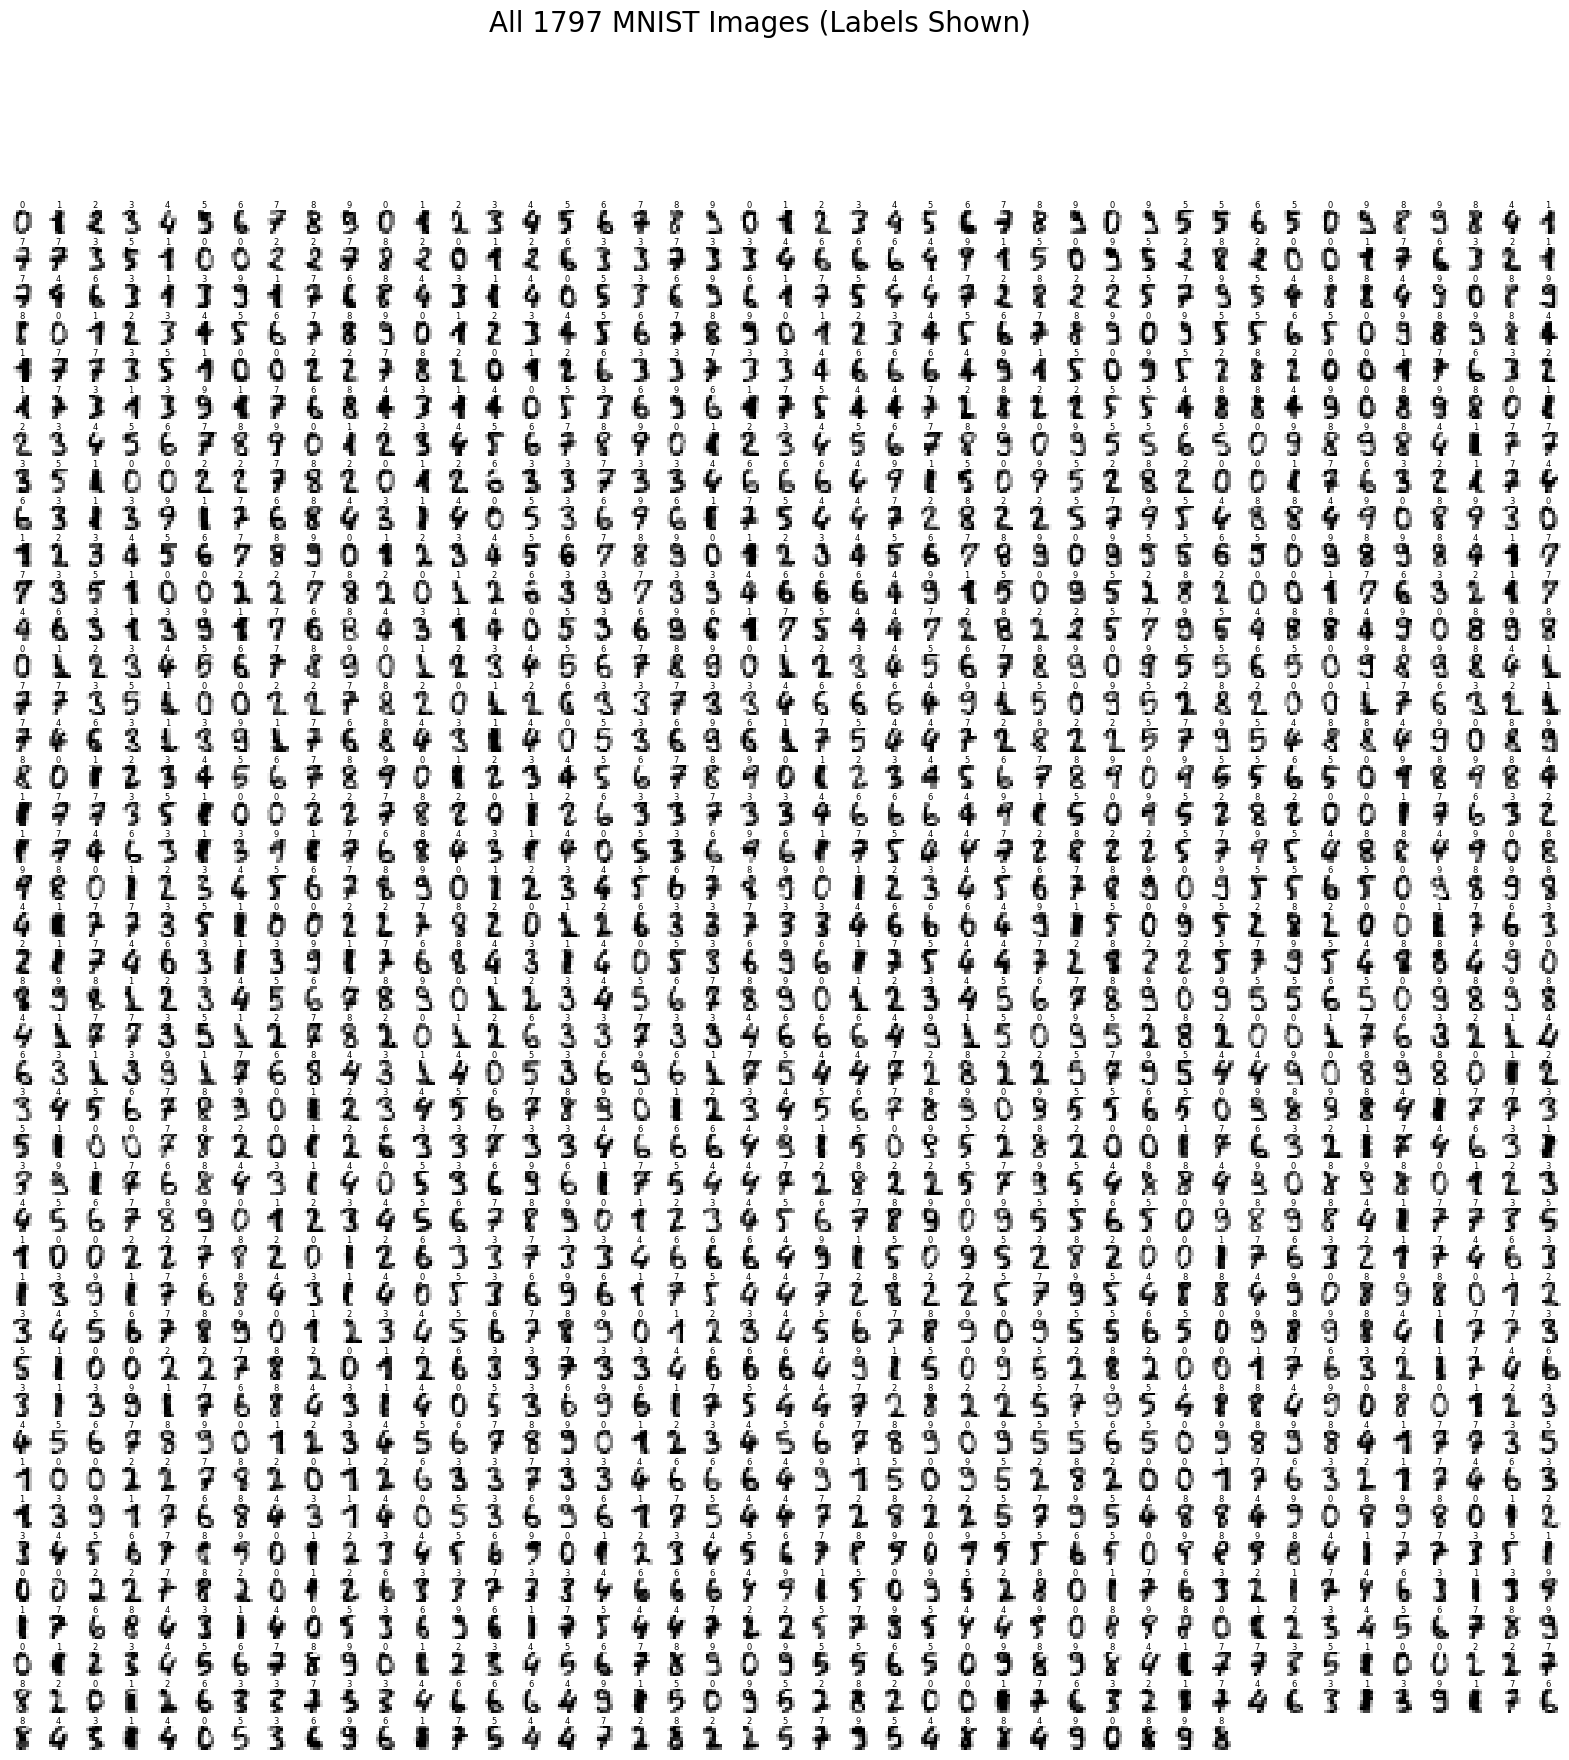

In [4]:
n_rows = int(len(images)**0.5)
n_cols = n_rows + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

axes = axes.ravel()

for i, (image, label) in enumerate(zip(images, labels)):
    axes[i].imshow(image, cmap='binary', interpolation='nearest')
    axes[i].set_title(str(label), fontsize=6, pad=1)  # tiny font and padding
    axes[i].axis('off')

# hide unused subplots (if grid size > number of images)
for j in range(len(images), n_rows * n_cols):
    axes[j].axis('off')

plt.suptitle(f"All {len(images)} MNIST Images (Labels Shown)", fontsize=20)
plt.show()

## Classifier

### Standard Testing and Training data split for Default models wit 70:30 ratio.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training Decision Tree Classifier with default parameters

Accuracy: 83.52%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.67      0.70      0.69        50
           2       0.80      0.77      0.78        47
           3       0.82      0.85      0.84        54
           4       0.80      0.82      0.81        60
           5       0.93      0.94      0.93        66
           6       0.84      0.92      0.88        53
           7       0.85      0.84      0.84        55
           8       0.80      0.74      0.77        43
           9       0.84      0.81      0.83        59

    accuracy                           0.84       540
   macro avg       0.83      0.83      0.83       540
weighted avg       0.84      0.84      0.84       540


Confusion Matrix:


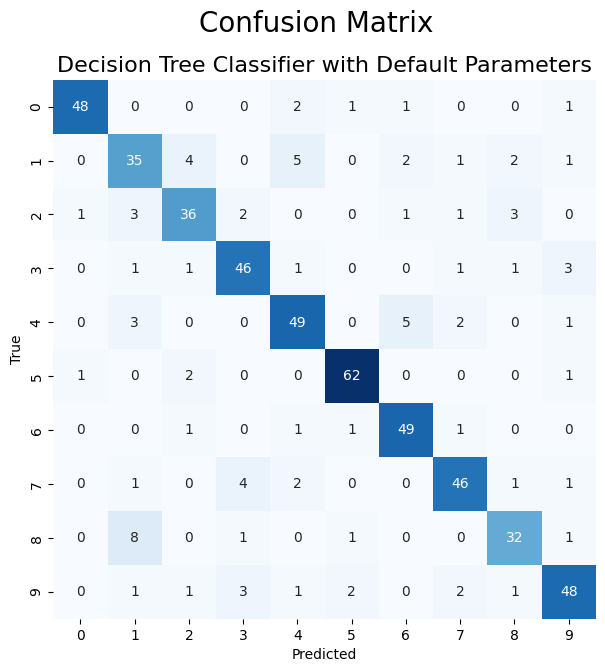

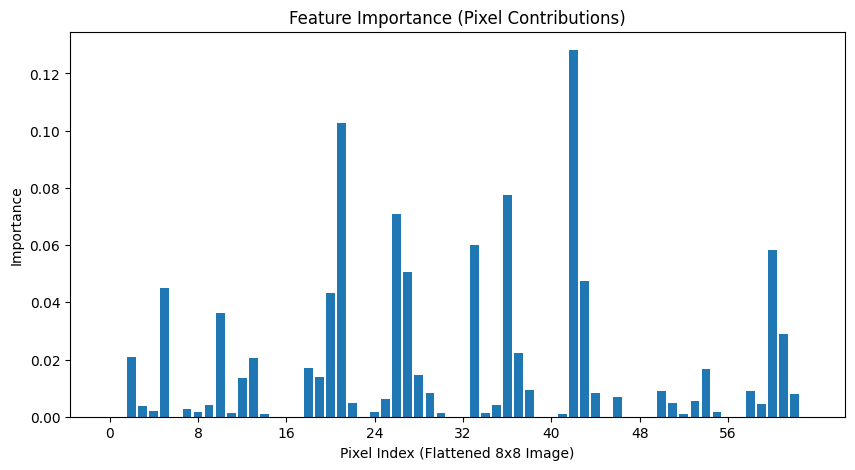

In [6]:
# init model & fit on training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# genrate confusion matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.suptitle("Confusion Matrix", fontsize=20)
plt.title("Decision Tree Classifier with Default Parameters", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# plot pixel/feature importance (based on decision tree splits)
plt.figure(figsize=(10, 5))
plt.bar(range(64), clf.feature_importances_)
plt.title("Feature Importance (Pixel Contributions)")
plt.xlabel("Pixel Index (Flattened 8x8 Image)")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()

### Observations

### Training Random Forest Classifier with default parameters

Accuracy: 98.15%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       1.00      0.98      0.99        54
           4       0.97      1.00      0.98        60
           5       0.97      0.97      0.97        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.98      0.97        43
           9       0.98      0.95      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


Confusion Matrix:


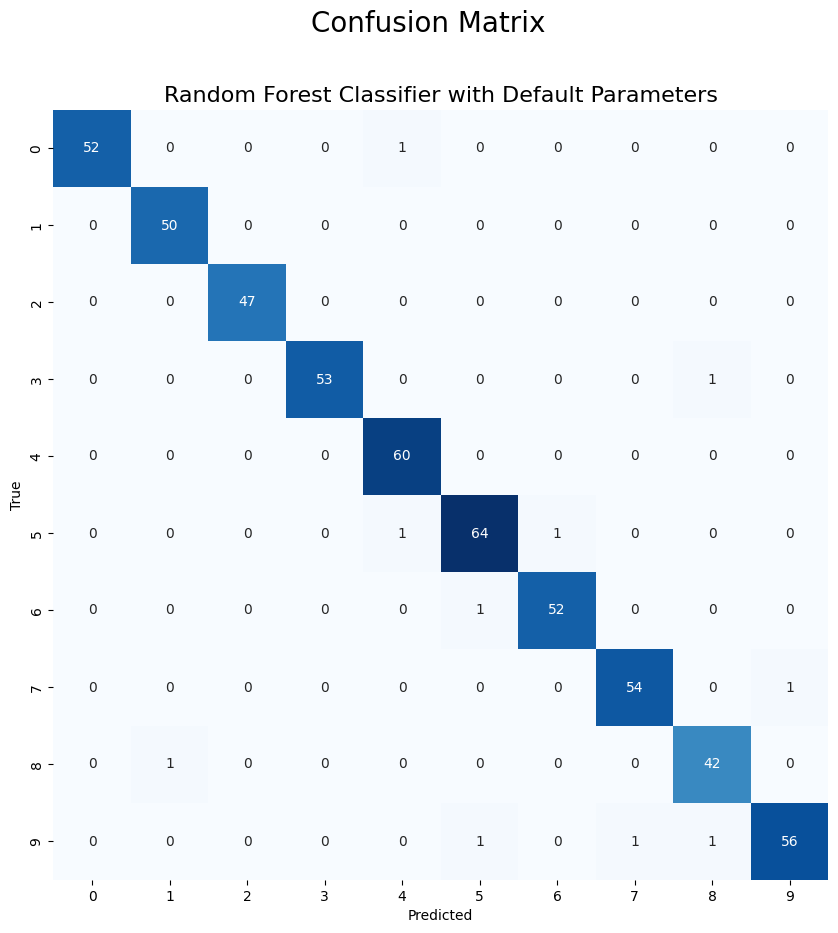

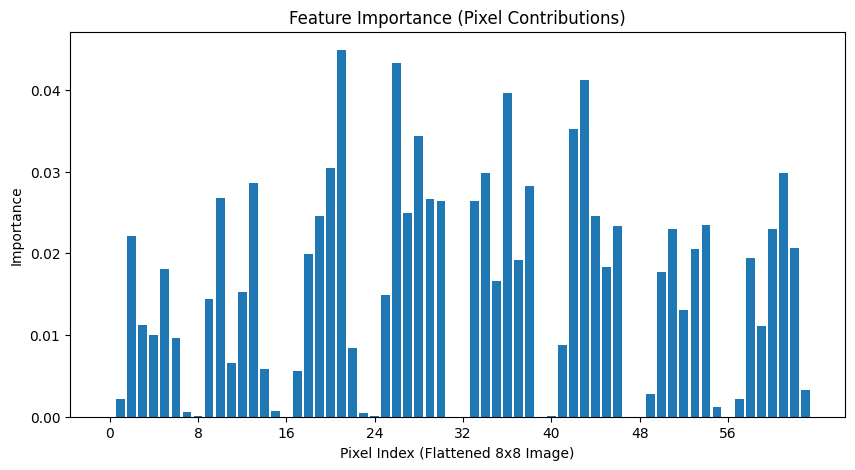

In [7]:
# init model & fit on training data
clfrc = RandomForestClassifier()
clfrc.fit(X_train, y_train)

# predict on test data
y_pred = clfrc.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# generate confusion matrix
print("\nConfusion Matrix:")

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.suptitle("Confusion Matrix", fontsize=20)
plt.title("Random Forest Classifier with Default Parameters", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# plot pixel importance (based on decision tree splits)
plt.figure(figsize=(10, 5))
plt.bar(range(64), clfrc.feature_importances_)
plt.title("Feature Importance (Pixel Contributions)")
plt.xlabel("Pixel Index (Flattened 8x8 Image)")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()

### Observations

### Decision Tree with Grid Search

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
Accuracy: 87.22%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        53
           1       0.85      0.90      0.87        50
           2       0.83      0.83      0.83        47
           3       0.84      0.89      0.86        54
           4       0.77      0.80      0.79        60
           5       0.97      0.85      0.90        66
           6       0.91      0.94      0.93        53
           7       0.86      0.93      0.89        55
           8       0.90      0.81      0.85        43
           9       0.89      0.81      0.85        59

    accuracy                           0.87       540
   macro avg       0.87      0.87      0.87       540
weighted avg       0.87      0.87      0.87       540


Confusion Matrix:


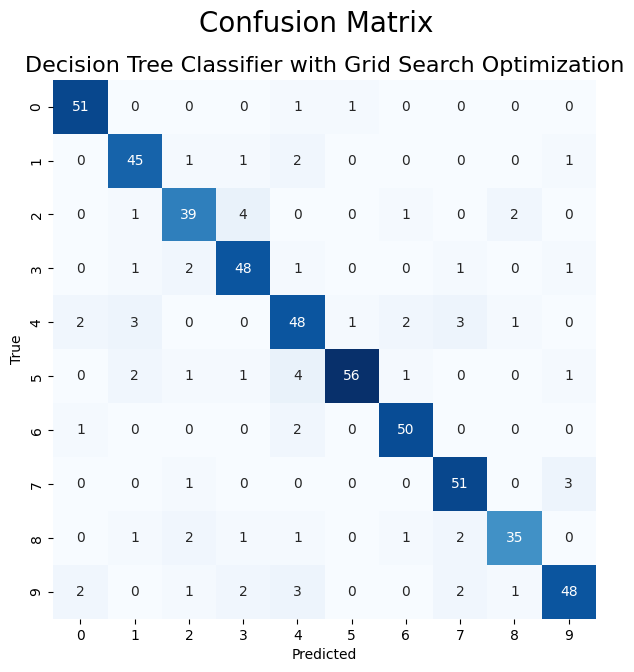

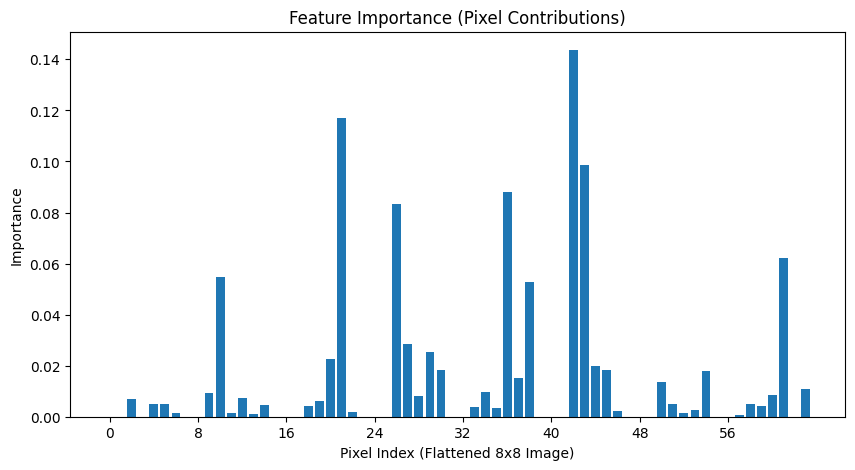

In [8]:
# init model
clf = DecisionTreeClassifier()

# define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the model on the training data
grid_search.fit(X_train, y_train)

# get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# create a new model with the best parameters
clf = DecisionTreeClassifier(**best_params)

# fit the "best" model on the training data
clf.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# generate confusion matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.suptitle("Confusion Matrix", fontsize=20)
plt.title("Decision Tree Classifier with Grid Search Optimization", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# plot pixel importance (based on decision tree splits)
plt.figure(figsize=(10, 5))
plt.bar(range(64), clf.feature_importances_)
plt.title("Feature Importance (Pixel Contributions)")
plt.xlabel("Pixel Index (Flattened 8x8 Image)")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()

### Observations:

### Random Forest with Grid Search

In [ ]:
# init model
clf = RandomForestClassifier()

# define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', n_jobs=-1)

# fit the model
grid_search.fit(X_train, y_train)

# get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# create a new model with the best parameters
clf = RandomForestClassifier(**best_params)

clf.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# generate confusion matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.suptitle("Confusion Matrix", fontsize=20)
plt.title("Random Forest Classifier with Grid Search Optimization", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# plot pixel importance (based on decision tree splits)
plt.figure(figsize=(10, 5))
plt.bar(range(64), clf.feature_importances_)
plt.title("Feature Importance (Pixel Contributions)")
plt.xlabel("Pixel Index (Flattened 8x8 Image)")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()

# Regression
##### * Perform Exploratory Data Analysis (EDA) on both datasets.
##### * Perform regression analysis task on the California-housing dataset, utilizing both DTRegressor and RandomRegressor with their default parameters. Which one performs better? Print out their respective Mean-Squared Error (MSE) and Coefficient of Determination (R-squared, R^2)
##### * Perform same task as #3, but now tune the regressors. Which one performs better? Print out their respective Mean-Squared Error (MSE) and Coefficient of Determination (R-squared, R^2)

### California Housing dataset
#### Data Set Characteristics:
* Number of Instances : 20640
* Number of Attributes : 8 numeric, predictive attributes and the target
* Attribute Information
* MedInc : median income in block group
* HouseAge : median house age in block group
* AveRooms : average number of rooms per household
* AveBedrms : average number of bedrooms per household
* Population : block group population
* AveOccup : average number of household members
* Latitude : block group latitude
* Longitude : block group longitude
* Target : The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).
* Missing Attribute Values : None


In [ ]:
# loading the California housing dataset
housing = fetch_california_housing()

# checking the type of the dataset
print(type(housing))

# converting the dataset to a pandas DataFrame
df_features = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df_target = pd.DataFrame(data=housing.target, columns=['target'])
df = pd.concat([df_features, df_target], axis=1)


## EDA

In [ ]:
print(f'Data shape: {df.shape}')
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
for col in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 30))
axes = axes.flatten()  # Flatten for simple looping
# Plot boxplots
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
plt.show()

In [ ]:
HVN = pd.DataFrame()
HVN['MHP'] = 'Price = ' + df['target'].astype(str)
HVN['Longitude'] = df['Longitude']
HVN['Latitude'] = df['Latitude']

# Create the scatter mapbox plot
fig = px.scatter_mapbox(HVN,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="MHP",
                        mapbox_style="open-street-map",
                        zoom=5)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0}, title_text="Distribution of Houses in California", title_x=0.5)
fig.show()


In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Greens').set_title('Correlation Matrix')

## Regression Modeling

In [ ]:
# split the data 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Decision Tree Regressor

In [ ]:
# init model
regressor = DecisionTreeRegressor(random_state=42)

# fit model
regressor.fit(X_train, y_train)

# predict
y_pred = regressor.predict(X_test)

# calcuate MSE & R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

#### Random Forest Regressor

In [ ]:
# init model
regressor = RandomForestRegressor(random_state=42)

# fit model
regressor.fit(X_train, y_train)

# predict
y_pred = regressor.predict(X_test)

# calcuate MSE & R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

### Optimized Models - Grid Search

#### Decision Tree Regressor - Grid Search

In [ ]:
# init model
clf = DecisionTreeRegressor()

# define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# fit the model
grid_search.fit(X_train, y_train)

# get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# create a "best" model with the best parameters
clf = DecisionTreeRegressor(**best_params)

# fit the model
clf.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)

# calculate MSE & R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# plot pixel importance
plt.figure(figsize=(10, 5))
plt.bar(range(64), clf.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()

#### Random Forest Regressor - Grid Search

In [ ]:
# init model
regressor = RandomForestRegressor()

# define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 5, 10, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

# fit the model
grid_search.fit(X_train, y_train)

# get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# create a new "best" model with the best parameters
regressor = RandomForestRegressor(**best_params)

# fit the model
regressor.fit(X_train, y_train)

# predict on test data
y_pred = regressor.predict(X_test)

# calculate MSE & R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(64), regressor.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.xticks(range(0, 64, 8), range(0, 64, 8))
plt.ylabel("Importance")
plt.show()